<a href="https://colab.research.google.com/github/renchuu/AI-ML-EDA/blob/main/fitness_pattern_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
import time
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('labeled.csv')

In [ ]:
X = df.drop(columns=['Experience_Level'])
y = df['Experience_Level']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# adjusting my dataset
bins = [df['Experience_Level'].min(), 0.33, 0.66, df['Experience_Level'].max()]
labels = ['Entry', 'Mid', 'Senior']
df['Experience_Category'] = pd.cut(df['Experience_Level'], bins=bins, labels=labels, include_lowest=True, duplicates='drop')

In [ ]:
df_cleaned = df.dropna(subset=['Experience_Category'])
X = df_cleaned.drop(columns=['Experience_Level', 'Experience_Category'])
y = df_cleaned['Experience_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
pca = PCA(random_state=0).fit(X_train)
x_train_pca = pca.transform(X_train)
x_test_pca = pca.transform(X_test)

In [ ]:
logreg = LogisticRegression()
start_time = time.time()
logreg.fit(x_train_pca, y_train)
end_time = time.time()
training_time = end_time - start_time

y_pred = logreg.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("Training time: {:.4f} seconds".format(training_time))
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))

Training time: 0.0475 seconds
Accuracy: 0.856
Precision: 0.856


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("Training time: {:.4f} seconds".format(training_time))
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))

Training time: 0.0456 seconds
Accuracy: 0.856
Precision: 0.856


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
svm_classifier = SVC()

start_time = time.time()
svm_classifier.fit(x_train_pca, y_train)
end_time = time.time()
training_time = end_time - start_time

y_pred = svm_classifier.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("Training time: {:.4f} seconds".format(training_time))
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))

Training time: 0.0351 seconds
Accuracy: 0.436
Precision: 0.190


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
start_time = time.time()
svm_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print("Training time: {:.4f} seconds".format(training_time))
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))

Training time: 0.0414 seconds
Accuracy: 0.436
Precision: 0.190


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df2 = pd.read_csv('unlabeled.csv')
df2 = df2.drop(columns=['Classes'])

In [ ]:
pca = PCA(random_state=6)
X_reduced = pca.fit_transform(df2)

print("Reduced Data:\n", X_reduced.shape)


Reduced Data:
 (243, 14)


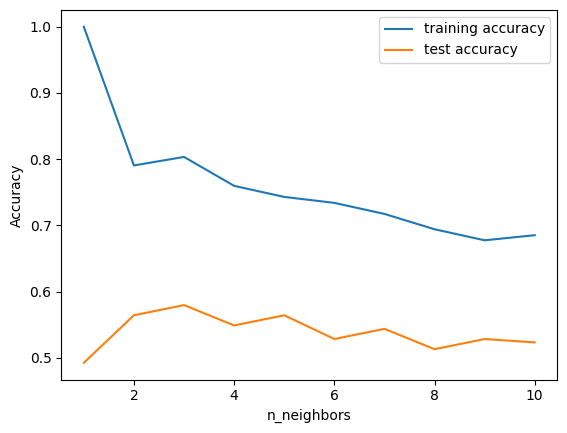

In [ ]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)


KMeans(n_clusters=3, random_state=42)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

labels = kmeans.labels_

silhouette_avg = silhouette_score(X_reduced, labels)
davies_bouldin = davies_bouldin_score(X_reduced, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.4043017581908927
Davies-Bouldin Index: 0.8540107256236898


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE( random_state=42)
X_tsne = tsne.fit_transform(df2)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_tsne)

labels = kmeans.labels_

silhouette_avg = silhouette_score(X_tsne, labels)
davies_bouldin = davies_bouldin_score(X_tsne, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.49444109201431274
Davies-Bouldin Index: 0.6572702107763136
